In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

In [32]:
lf = pd.read_excel('/content/drive/MyDrive/PT_Data_Science/PandasForDataManipulation/letter_frequency.xlsx', index_col = 0)

In [33]:
lf.head()

,Letter,Frequency of Letters,Proportion
0,A,8.4966%,43.31
1,B,2.072%,10.56
2,C,4.5388%,23.13
3,D,3.3844%,17.25
4,E,11.1607%,56.88


In [34]:
lf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Letter                26 non-null     object 
 1   Frequency of Letters  26 non-null     object 
 2   Proportion            26 non-null     float64
dtypes: float64(1), object(2)
memory usage: 832.0+ bytes


In [35]:
lf['Frequency of Letters'] = lf['Frequency of Letters'].replace('%','',regex = True)

In [43]:
lf["Frequency of Letters"] = lf["Frequency of Letters"].astype('float')

In [37]:
lf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Letter                26 non-null     object 
 1   Frequency of Letters  26 non-null     object 
 2   Proportion            26 non-null     float64
dtypes: float64(1), object(2)
memory usage: 832.0+ bytes


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


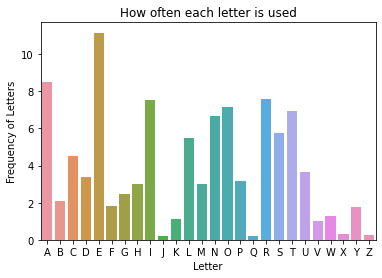

In [47]:
sns.barplot(lf['Letter'], lf['Frequency of Letters'])
plt.title('How often each letter is used');

In [50]:
#top 5 most common letters along with their frequencies and proportions
lf.nlargest(5, 'Frequency of Letters')

,Letter,Frequency of Letters,Proportion
4,E,11.1607,56.88
0,A,8.4966,43.31
17,R,7.5809,38.64
8,I,7.5448,38.45
14,O,7.1635,36.51


In [51]:
# 5 least common letters along with their frequencies and proportions
lf.nsmallest(5, 'Frequency of Letters')

,Letter,Frequency of Letters,Proportion
16,Q,0.1962,1.00
9,J,0.1965,1.00
25,Z,0.2722,1.39
23,X,0.2902,1.48
21,V,1.0074,5.13


In [69]:
#Filter the dataset to just show rows for vowels (A, E, I, O, U)

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score

In [70]:
train = pd.read_csv('/content/drive/MyDrive/PT_Data_Science/PandasForDataManipulation/belt_train.csv')
test = pd.read_csv('/content/drive/MyDrive/PT_Data_Science/PandasForDataManipulation/belt_test.csv')

In [72]:
train.head()

,letter,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,0.39,...,0.609,0.610,0.611,0.612,0.613,0.614,0.615,0.616,0.617,0.618,0.619,0.620,0.621,0.622,0.623,0.624,0.625,0.626,0.627,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [74]:
X_train = train.drop(columns= 'letter')/255
X_test = test.drop(columns= 'letter')/255
y_train = train['letter']
y_test = test['letter']

In [76]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = .3, random_state = 42)

In [80]:
X_train.shape

(146000, 784)

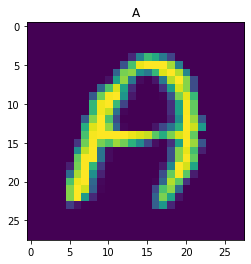

In [86]:
class_names = {0 : 'A', 1: 'B', 2:'C', 3:'D', 4: 'E',
               5: 'F', 6: 'G', 7:'H', 8:'I', 9:'J', 10: 'K', 11:'L', 12:'M', 13: 'N',
               14: 'O', 15: 'P', 16:'Q', 17:'R', 18:'S', 19: 'T', 20:'U', 21:'V', 22: 'W',
               23: 'X', 24: 'Y', 25:'Z'}
plt.imshow(np.array(X_train.loc[1,:]).reshape(28,28))
plt.title('{}'.format(class_names[y_train[1]]));

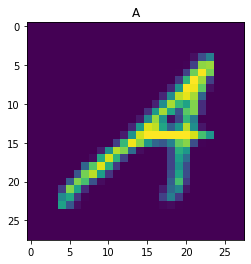

In [87]:
plt.imshow(np.array(X_train.loc[42,:]).reshape(28,28))
plt.title('{}'.format(class_names[y_train[42]]));

In [91]:
X_train = np.array(X_train).reshape(X_train.shape[0], 28, 28, 1)
X_val = np.array(X_val).reshape(X_val.shape[0], 28, 28, 1)

In [92]:
y_train = to_categorical(y_train, num_classes = 26)
y_val = to_categorical(y_val, num_classes=26)

In [93]:
input_shape = X_train.shape[1:4]
input_shape

(28, 28, 1)

In [97]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu',input_shape = input_shape))
Dropout(.2)
model.add(MaxPooling2D(pool_size= 2))
model.add(Flatten())
model.add(Dense(26,
                activation = 'softmax'))

In [98]:
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [99]:
history = model.fit(X_train, y_train,
                    validation_data = (X_val, y_val),
                    batch_size=3568,
                    epochs = 100)

Epoch 1/100
41/41 [==============================] - 49s 1s/step - loss: 1.8205 - acc: 0.5119 - val_loss: 0.8405 - val_acc: 0.7789
Epoch 2/100
41/41 [==============================] - 47s 1s/step - loss: 0.6320 - acc: 0.8276 - val_loss: 0.5175 - val_acc: 0.8575
Epoch 3/100
41/41 [==============================] - 47s 1s/step - loss: 0.4672 - acc: 0.8724 - val_loss: 0.4267 - val_acc: 0.8843
Epoch 4/100
41/41 [==============================] - 47s 1s/step - loss: 0.3913 - acc: 0.8952 - val_loss: 0.3640 - val_acc: 0.9038
Epoch 5/100
41/41 [==============================] - 47s 1s/step - loss: 0.3317 - acc: 0.9128 - val_loss: 0.3131 - val_acc: 0.9191
Epoch 6/100
41/41 [==============================] - 47s 1s/step - loss: 0.2845 - acc: 0.9261 - val_loss: 0.2714 - val_acc: 0.9301
Epoch 7/100
41/41 [==============================] - 47s 1s/step - loss: 0.2475 - acc: 0.9364 - val_loss: 0.2405 - val_acc: 0.9389
Epoch 8/100
41/41 [==============================] - 47s 1s/step - loss: 0.2186 - a

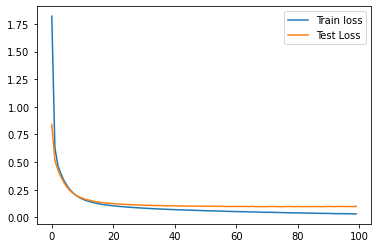

In [100]:
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.legend();

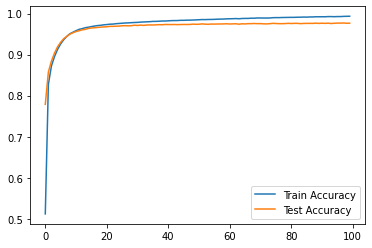

In [101]:
plt.plot(history.history['acc'], label='Train Accuracy')
plt.plot(history.history['val_acc'], label='Test Accuracy')
plt.legend();

In [102]:
X_test = np.array(X_test).reshape(X_test.shape[0], 28, 28, 1)

In [103]:
preds = np.argmax(model.predict(X_test), axis=-1)

In [104]:
accuracy_score(y_test, preds)

0.9775271848570278

In [105]:
from sklearn.metrics import confusion_matrix

In [109]:
cf_matrix = confusion_matrix(y_test, preds)

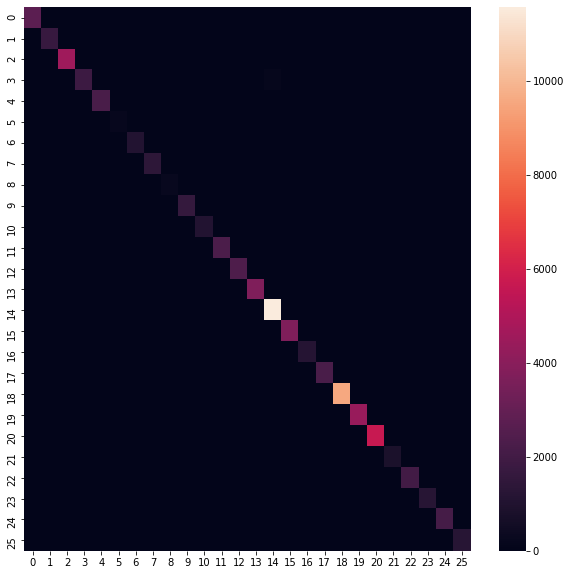

In [119]:
plt.figure(figsize = (10, 10))
sns.heatmap(cf_matrix);